In [1]:
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

import xarray as xr
import sys
sys.path.append('../dataset')
from data.common import  CreateListOfLinkfilesInSpan

In [2]:
f = open('../path_to_data.txt', "r")
path_to_dataset = f.readline().rstrip("\n")
f.close() 

In [3]:
y_train = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/train/y.npy'))
y_val = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/validation/y.npy'))
y_test = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/test/y.npy'))

In [4]:
def view_label(y):
    tot = len(y)
    print(tot)
    rain = len(y[y > 0.0])
    print('rain fraction', rain/tot)
    fig, ax = plt.subplots(figsize = (8,5))
    ax.hist(y[y > 0.0], bins = 500)
    plt.show()
    #print('smallest non-zero value', min(y[y > 0.0]))
    sorted_pos = np.sort(y[y>0.0])
    print('smallest non-zero values', sorted_pos[sorted_pos<0.1])
    print('amount',len(sorted_pos[sorted_pos<0.1]))
    print('small rain fraction of rain', len(sorted_pos[sorted_pos<0.1])/rain)
    fig, ax = plt.subplots(figsize = (8,5))
    ax.hist(np.log(y[y > 0.0]), bins = 500)
    plt.show()

83360758
rain fraction 0.06227764867493168


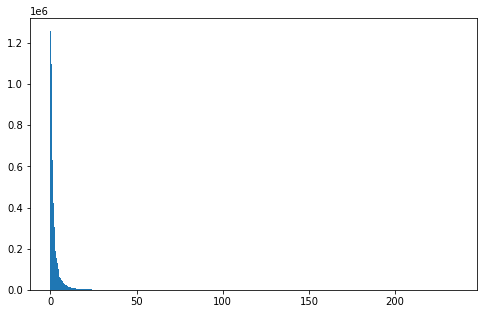

smallest non-zero values [0.02761395 0.02761395 0.03103964 0.03103964 0.03140611 0.03340144
 0.03340144 0.03676442 0.03676442 0.0442377  0.0442377  0.04519418
 0.04673437 0.0515606  0.06045365 0.06107258 0.06287173 0.0631508
 0.0631508  0.06326129 0.06326129 0.06495725 0.06555083 0.06555083
 0.06570843 0.06570843 0.0658026  0.06616142 0.06630769 0.06732467
 0.06816987 0.06906876 0.06939688 0.06939688 0.06993606 0.07024844
 0.07024844 0.07054906 0.07153081 0.07153081 0.07202037 0.07419198
 0.0746734  0.0746734  0.07483987 0.07579058 0.07579058 0.07636003
 0.07636003 0.07637342 0.07670072 0.07685816 0.07720342 0.07720342
 0.07755654 0.07813062 0.07813062 0.07850882 0.0795542  0.08043658
 0.08053171 0.08053171 0.08172617 0.08180412 0.08233176 0.08233176
 0.08284495 0.08295278 0.08369946 0.08463529 0.08463529 0.08474543
 0.084838   0.084838   0.08506875 0.08506875 0.08535788 0.08568636
 0.08568636 0.08617372 0.08617372 0.08718549 0.08718549 0.08783575
 0.08783575 0.08791491 0.08791491 0.08

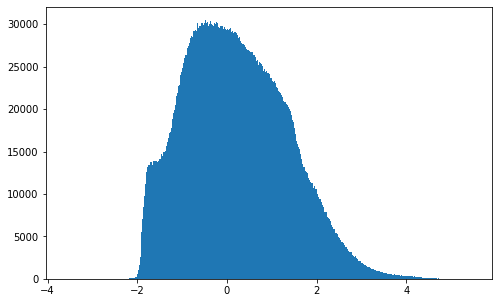

In [5]:
view_label(y_train)

20805499
rain fraction 0.06095402950921773


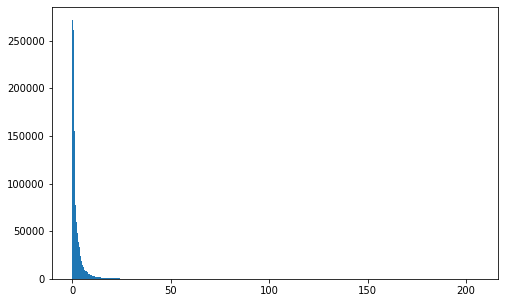

smallest non-zero values [0.03984801 0.03984801 0.04048919 0.04845629 0.04845629 0.053758
 0.053758   0.05937989 0.05937989 0.06032014 0.06153273 0.06333937
 0.06333937 0.06596954 0.06961817 0.07022233 0.07426675 0.07705447
 0.07705447 0.07849403 0.08010634 0.08010634 0.08426783 0.08426783
 0.08709716 0.08946238 0.08946238 0.09184182 0.09227362 0.09227362
 0.09439441 0.09563413 0.09569431 0.09569431 0.09610417 0.09610417
 0.09766445 0.09786455 0.09818911 0.09818911 0.09873698]
amount 41
small rain fraction of rain 3.23298209479892e-05


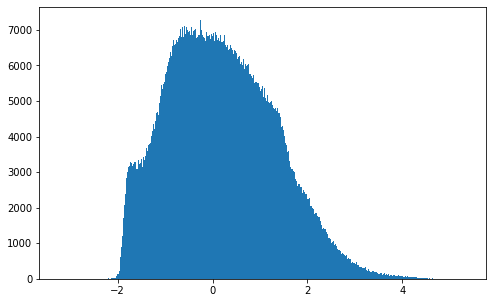

In [6]:
view_label(y_val)

44869385
rain fraction 0.05963063679165649


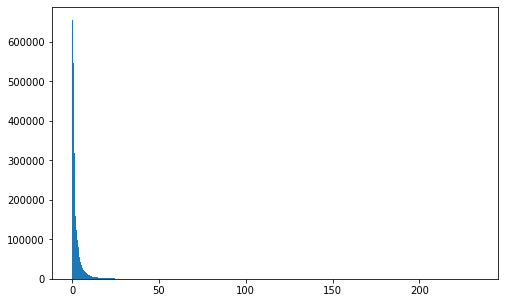

smallest non-zero values [0.0386392  0.0386392  0.04500788 0.04792185 0.0550799  0.0550799
 0.05520627 0.05781156 0.05888985 0.05888985 0.0597284  0.0597284
 0.06344275 0.0646996  0.06509441 0.06514675 0.06670175 0.06704091
 0.0749062  0.07555184 0.07555184 0.07566805 0.07695537 0.07818043
 0.07838187 0.07838187 0.07900951 0.07900951 0.08056882 0.0808282
 0.08152073 0.08152073 0.08294161 0.08294161 0.08360825 0.08360825
 0.08385351 0.08567309 0.08567309 0.08829244 0.08847138 0.08879577
 0.08894285 0.08894285 0.08944032 0.09045096 0.09045096 0.0908435
 0.09116005 0.09116005 0.09232375 0.09370644 0.09370644 0.09388416
 0.09390878 0.09390878 0.09411214 0.09440164 0.09558157 0.09561253
 0.09635591 0.09637523 0.09637523 0.09753049 0.09753049 0.09783568
 0.09783568 0.098097   0.09831586 0.09831586 0.09861481 0.09867995]
amount 72
small rain fraction of rain 2.6909952571208594e-05


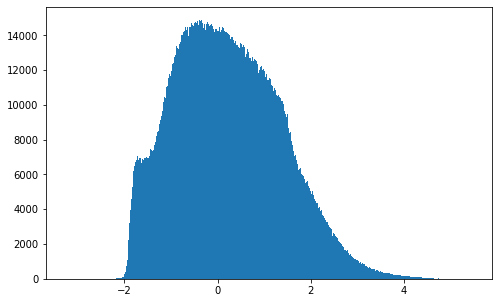

In [7]:
view_label(y_test)

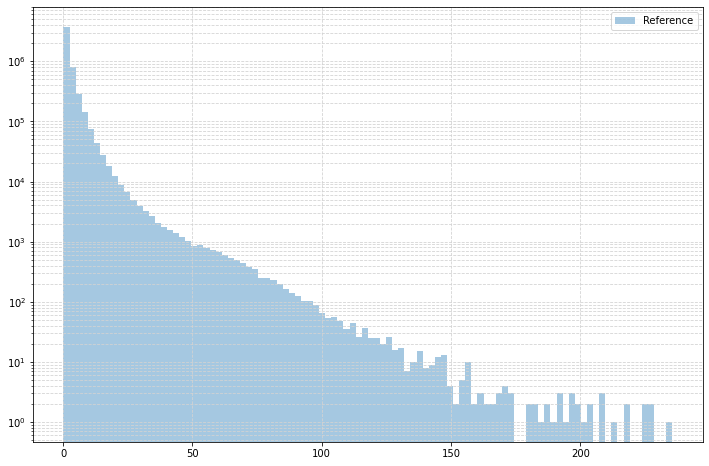

In [8]:
N = np.max(y_train)
bins = np.linspace(0.1,N,101)
alpha=0.4
histtype='bar'
fig, ax = plt.subplots(figsize=(12,8))

ax.hist(y_train, histtype=histtype, bins=bins,alpha=alpha, label='Reference')
ax.set_yscale("log")
ax.grid(True,which="both",ls="--",c='lightgray')
ax.legend()
plt.show()


In [9]:
len(y_test[(y_test < 1e-1) & (y_test > 0.0)])

72

In [10]:
len(y_train[y_train > 0.0])

5191512

In [11]:
len(y_train[(y_train > 1e2)])

605

In [12]:
len(y_test[(y_test > 1e2)])

307

In [14]:
len(y_test[y_test==0.0])/len(y_test)

0.9403693632083435